In [14]:
# Customer Churn Prediction - Full Workflow

# 1. IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# 2. LOAD DATA
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
# 3. CLEANING & FEATURE ENGINEERING
# Display column names and unique values for reference
print("\nColumn Names:\n", df.columns.tolist())
print("\nUnique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].unique()[:10]}")

# Remove rows with missing or blank 'TotalCharges'
df = df[df['TotalCharges'].str.strip() != '']
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.drop(['customerID'], axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


Column Names:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique Values in Each Column:
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-POOKP' '6388-TABGU']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No in

/tmp/ipython-input-697794699.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype(float)
/tmp/ipython-input-697794699.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['customerID'], axis=1, inplace=True)
/tmp/ipython-input-697794699.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [16]:
# 4. TRAIN/TEST SPLIT
X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
# 5. MODEL TRAINING
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained successfully.")


Logistic Regression trained successfully.
Random Forest trained successfully.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:08:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost trained successfully.


In [18]:
# 6. EVALUATION & METRICS
accuracy_results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_results[name] = acc

    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression Evaluation:
Accuracy: 0.7854
Precision: 0.6208
Recall: 0.4947
F1 Score: 0.5506
Confusion Matrix:
[[920 113]
 [189 185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407


Random Forest Evaluation:
Accuracy: 0.7918
Precision: 0.6431
Recall: 0.4866
F1 Score: 0.5540
Confusion Matrix:
[[932 101]
 [192 182]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407


XGBoost Evaluation:
Acc

<Figure size 1000x600 with 0 Axes>

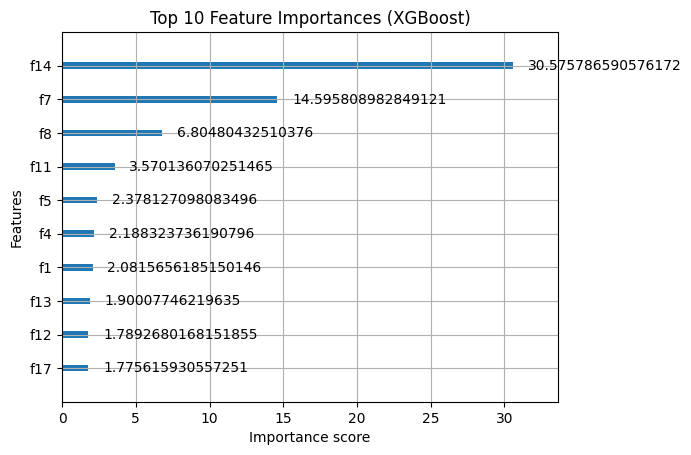

In [19]:
# 7. XGBOOST FEATURE IMPORTANCE
plt.figure(figsize=(10,6))
plot_importance(trained_models['XGBoost'], max_num_features=10, importance_type='gain')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()

# 8. CHURN PROBABILITY PREDICTIONS
churn_probs = trained_models['XGBoost'].predict_proba(X_scaled)[:, 1]
df['Churn_Probability'] = churn_probs



In [20]:
print(df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              1                0               0             2  ...   
1              0                0               2             0  ...   
2              0                0               2             2  ...   
3              1                0               2             0  ...   
4              0                1               0             0  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         0          

In [21]:
# Create mapping dictionaries for decoding
decode_maps = {
    'gender': {0: 'Female', 1: 'Male'},
    'Partner': {0: 'No', 1: 'Yes'},
    'Dependents': {0: 'No', 1: 'Yes'},
    'PhoneService': {0: 'No', 1: 'Yes'},
    'MultipleLines': {0: 'No', 1: 'Yes', 2: 'No phone service'},
    'InternetService': {0: 'DSL', 1: 'Fiber optic', 2: 'No'},
    'OnlineSecurity': {0: 'No', 1: 'Yes', 2: 'No internet service'},
    'OnlineBackup': {0: 'No', 1: 'Yes', 2: 'No internet service'},
    'DeviceProtection': {0: 'No', 1: 'Yes', 2: 'No internet service'},
    'TechSupport': {0: 'No', 1: 'Yes', 2: 'No internet service'},
    'StreamingTV': {0: 'No', 1: 'Yes', 2: 'No internet service'},
    'StreamingMovies': {0: 'No', 1: 'Yes', 2: 'No internet service'},
    'Contract': {0: 'Month-to-month', 1: 'One year', 2: 'Two year'},
    'PaperlessBilling': {0: 'No', 1: 'Yes'},
    'PaymentMethod': {
        0: 'Electronic check',
        1: 'Mailed check',
        2: 'Bank transfer (automatic)',
        3: 'Credit card (automatic)'
    },
    'Churn': {0: 'No', 1: 'Yes'}
}

# Apply decoding
for col, mapping in decode_maps.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)


In [22]:
df.to_csv('/content/churn_predictions_cleaned.csv', index=False)
print("Decoded dataset exported as 'churn_predictions_cleaned.csv'")


Decoded dataset exported as 'churn_predictions_cleaned.csv'


In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Probability
0,Female,0,Yes,No,1,No,Yes,DSL,No,No internet service,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),29.85,29.85,No,0.509028
1,Male,0,No,No,34,Yes,No,DSL,No internet service,No,...,No,No,No,One year,No,Credit card (automatic),56.95,1889.50,No,0.014853
2,Male,0,No,No,2,Yes,No,DSL,No internet service,No internet service,...,No,No,No,Month-to-month,Yes,Credit card (automatic),53.85,108.15,Yes,0.580316
3,Male,0,No,No,45,No,Yes,DSL,No internet service,No,...,No internet service,No,No,One year,No,Electronic check,42.30,1840.75,No,0.015193
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.70,151.65,Yes,0.692394


In [25]:
telco_data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the name and first row
print("📄 Dataset: telco_data")
print(telco_data.head())

📄 Dataset: telco_data
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovie

In [26]:
df_original = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [27]:
df_original['TotalCharges'] = pd.to_numeric(df_original['TotalCharges'], errors='coerce')
df_original_cleaned = df_original.dropna(subset=['TotalCharges']).reset_index(drop=True)


In [28]:
df['customerID'] = df_original_cleaned['customerID']


In [29]:
df = df[['customerID'] + [col for col in df.columns if col != 'customerID']]


In [30]:
df.to_csv('/content/churn_predictions.csv', index=False)


In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Probability
0,7590-VHVEG,Female,0,Yes,No,1,No,Yes,DSL,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),29.85,29.85,No,0.509028
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,No internet service,...,No,No,No,One year,No,Credit card (automatic),56.95,1889.50,No,0.014853
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,No internet service,...,No,No,No,Month-to-month,Yes,Credit card (automatic),53.85,108.15,Yes,0.580316
3,7795-CFOCW,Male,0,No,No,45,No,Yes,DSL,No internet service,...,No internet service,No,No,One year,No,Electronic check,42.30,1840.75,No,0.015193
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.70,151.65,Yes,0.692394
